In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

other_file = "../merged_data/merged_all_data.csv"

In [54]:
other_df = pd.read_csv(other_file)

cleaner_df = other_df.drop(columns=['NAICS Code'])
employment_df = cleaner_df[['Description','Employment_2000','Employment_2001','Employment_2002','Employment_2003','Employment_2004',
                           'Employment_2005','Employment_2006','Employment_2007','Employment_2008','Employment_2009',
                           'Employment_2010','Employment_2011','Employment_2012','Employment_2013','Employment_2014','Employment_2015']]
establishment_df = cleaner_df[['Description','Establishments_2000','Establishments_2001','Establishments_2002','Establishments_2003',
                              'Establishments_2004','Establishments_2005','Establishments_2006','Establishments_2007','Establishments_2008',
                              'Establishments_2009','Establishments_2010','Establishments_2011','Establishments_2012','Establishments_2013',
                              'Establishments_2014','Establishments_2015']]
establishment_df = establishment_df.transpose()
establishment_df.columns = establishment_df.iloc[0]
establishment_df = establishment_df.drop(establishment_df.index[0])

employment_df = employment_df.transpose()
employment_df.columns = employment_df.iloc[0]
employment_df = employment_df.drop(employment_df.index[0])

employment_df = employment_df.rename(columns = {'Furniture and Home Furnishings Stores':'Furniture',
                                                'Electronics and Appliance Stores':'Electronics',
                                                'Grocery Stores':'Grocery',
                                                'Clothing and Clothing Accessories Stores':'Clothing'})
establishment_df = establishment_df.rename(columns = {'Furniture and Home Furnishings Stores':'Furniture',
                                                'Electronics and Appliance Stores':'Electronics',
                                                'Grocery Stores':'Grocery',
                                                'Clothing and Clothing Accessories Stores':'Clothing'})

employment_df.Furniture = pd.to_numeric(employment_df.Furniture.str.replace(',',''), errors = 'coerce')
employment_df.Electronics = pd.to_numeric(employment_df.Electronics.str.replace(',',''), errors = 'coerce')
employment_df.Grocery = pd.to_numeric(employment_df.Grocery.str.replace(',',''), errors = 'coerce')
employment_df.Clothing = pd.to_numeric(employment_df.Clothing.str.replace(',',''), errors = 'coerce')

establishment_df.Furniture = pd.to_numeric(establishment_df.Furniture.str.replace(',',''), errors = 'coerce')
establishment_df.Electronics = pd.to_numeric(establishment_df.Electronics.str.replace(',',''), errors = 'coerce')
establishment_df.Grocery = pd.to_numeric(establishment_df.Grocery.str.replace(',',''), errors = 'coerce')
establishment_df.Clothing = pd.to_numeric(establishment_df.Clothing.str.replace(',',''), errors = 'coerce')
employment_df

Description,Furniture,Electronics,Grocery,Clothing
Employment_2000,549184,407321,2716868,1368665
Employment_2001,567318,425736,2665804,1392626
Employment_2002,551567,418725,2569351,1408948
Employment_2003,560717,419321,2594727,1467427
Employment_2004,576733,457819,2660804,1555098
Employment_2005,575629,469248,2642609,1555928
Employment_2006,578075,488784,2615175,1631450
Employment_2007,596538,500780,2564533,1648157
Employment_2008,533096,464927,2570754,1648150
Employment_2009,449836,448946,2561669,1535923


In [55]:
furniture_decrease = establishment_df['Furniture'][0]-establishment_df['Furniture'][15]
electronics_decrease = establishment_df['Electronics'][0]-establishment_df['Electronics'][15]
grocery_decrease = establishment_df['Grocery'][0]-establishment_df['Grocery'][15]
clothing_decrease = establishment_df['Clothing'][0]-establishment_df['Clothing'][15]


In [56]:
labels = ["Furniture", "Electronics", "Grocery", "Clothing"]
sizes = [furniture_decrease, electronics_decrease, grocery_decrease, clothing_decrease]
x = range(4)

list(x)

[0, 1, 2, 3]

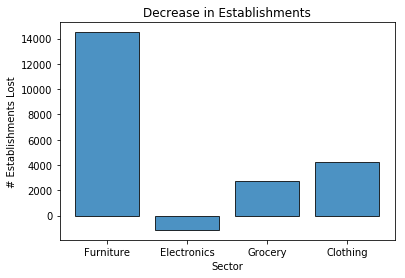

In [57]:
plt.bar(x, sizes, alpha = .8,edgecolor='k')
plt.xticks(x,labels)
plt.xlabel("Sector")
plt.ylabel("# Establishments Lost")
plt.title("Decrease in Establishments")
plt.savefig("complete_plots/EstDecreaseBar.png",bbox_inches='tight')


In [58]:
em_furniture_decrease = employment_df['Furniture'][0]-employment_df['Furniture'][15]
em_electronics_decrease = employment_df['Electronics'][0]-employment_df['Electronics'][15]
em_grocery_decrease = employment_df['Grocery'][0]-employment_df['Grocery'][15]
em_clothing_decrease = employment_df['Clothing'][0]-employment_df['Clothing'][15]

sizes2 = [em_furniture_decrease,em_electronics_decrease,em_grocery_decrease,em_clothing_decrease]

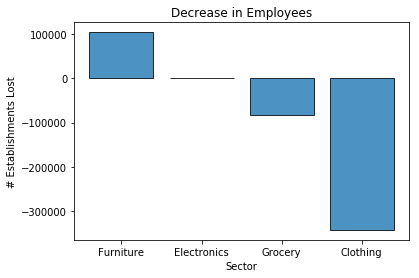

In [59]:
plt.bar(x, sizes2, alpha = .8,edgecolor='k')
plt.xticks(x,labels)
plt.xlabel("Sector")
plt.ylabel("# Establishments Lost")
plt.title("Decrease in Employees")
plt.savefig("complete_plots/EmployeeDecreaseBar.png",bbox_inches='tight')
